***Классификация изображений: по набору данных MNIST, который состоит из рукописных цифр обучить нейросеть для их распознавания.***


MNIST (Modified National Institute of Standards and Technology) - это классический набор данных для распознавания рукописных цифр, который широко используется в машинном обучении и компьютерном зрении.

Ход работы:
1. Импортирую набор данных и вывожу первое изображение, чтобы посмотреть как это выглядит

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


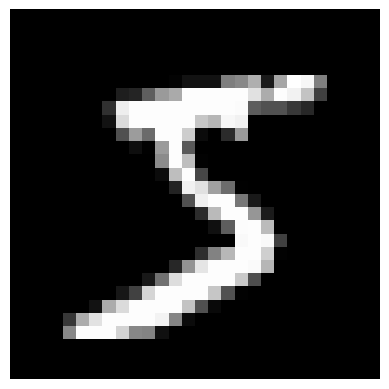

In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

# Загружаем набор данных MNIST из sklearn
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

# Преобразуем данные в формат numpy массивов
X = np.array(X)
y = np.array(y)

# Выводим первое изображение из набора данных
first_image = X[0].reshape(28, 28)
plt.imshow(first_image, cmap='gray')
plt.axis('off')
plt.show()


2. Предобработка данных

Набор данных MNIST представляет собой набор изображений рукописных цифр от 0 до 9. Проведем предобработку данных, например, масштабирование значений пикселей, чтобы они находились в диапазоне от 0 до 1, и возможно преобразование данных в нужный формат, например, изображения в формате 28x28 пикселей.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import numpy as np

X_normalized = X / 255.0 # Нормализация данных

# Разделение данных на обучающие и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Преобразование целевой переменной
encoder = OneHotEncoder(sparse = False)
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

# Проверяем успешно ли прошла нормализация
min_value = np.min(X_normalized)
max_value = np.max(X_normalized)

print("Минимальное значение в X_normalized:", min_value)
print("Максимальное значение в X_normalized:", max_value)

Минимальное значение в X_normalized: 0.0
Максимальное значение в X_normalized: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import fetch_openml

data = fetch_openml('mnist_784') # получение датасета
print("Форма входных данных (X):", data.data.shape)
print("Форма целевых значений (y):", data.target.shape)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Форма входных данных (X): (70000, 784)
Форма целевых значений (y): (70000,)


***Вывод по фрагменту выше:***
- Форма входных данных (X) равна (70000, 784), что означает, что у нас есть 70000 образцов данных (изображений рукописных цифр), каждый из которых представлен в виде одномерного массива из 784 признаков. В данном случае каждый признак соответствует одному пикселю изображения размером 28x28 пикселей, который был "развёрнут" в одномерный массив.

- Форма целевых значений (y) равна (70000,), что указывает на то, что у нас есть 70000 меток (цифры от 0 до 9), соответствующих каждому образцу данных (изображению).

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Гиперпараметры для GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (100, 50, 20)],
    'activation': ['relu', 'tanh'],
    'alpha': [1e-4, 1e-3, 1e-2],
    'solver': ['adam', 'sgd']
}

# GridSearchCV с ранней остановкой
grid = GridSearchCV(MLPClassifier(max_iter=20, learning_rate_init=0.001), param_grid, cv=5, scoring='accuracy', n_jobs=-1, refit=True, verbose=1)
grid.fit(X_train, y_train)

# Лучшая модель
best_model = grid.best_estimator_
print(f"Лучшие гиперпараметры: {grid.best_params_}")
# ... (ваш код для предсказания с использованием best_model)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


KeyboardInterrupt: 

In [ ]:
# Подбор параметров с помощью случайного леса, который оказался ненужен
if data.data.shape[0] == 0 or data.target.shape[0] == 0:
    print("Ошибка: Данные не загружены или содержат недостаточное количество образцов")
else:
    X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=42)

param_grid = {
    'n_estimators': [5, 10, 15, 20],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 3, 4]
}
rf = RandomForestClassifier()  # Используем случайный лес
grid_search = GridSearchCV(rf, param_grid, cv=5)  # выполняется GridSearchCV: rf - случайный лес, 5 - количество блоков
grid_search.fit(X_train, y_train)

print("Оптимальные параметры: ", grid_search.best_params_)
rf_best_score = grid_search.best_score_
print("Лучший результат: ", grid_search.best_score_)

Оптимальные параметры:  {'max_depth': None, 'min_samples_split': 4, 'n_estimators': 20}
Лучший результат:  0.9564693877551018


3. Создание нейронной сети

In [ ]:
from sklearn.neural_network import MLPClassifier
# Создание нейронной сети
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=20, alpha=1e-4, solver="adam", learning_rate_init=0.001)
# Обучаем нейронную сеть
mlp.fit(X_train, y_train)
# Оценка точности модели
accuracy = mlp.score(X_test, y_test)
print ("Точность работы нейросети: ", accuracy * 100)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Точность работы нейросети:  97.41904761904762


Использованные параметры:

1. **hidden_layer_sizes=(100,)**: Этот параметр указывает на количество скрытых слоев и количество нейронов в каждом слое. В данном случае, у нас один скрытый слой с 100 нейронами в нем. Вы можете изменять это значение, чтобы добавить или убрать скрытые слои и нейроны.

2. **max_iter=20**: Этот параметр ограничивает количество итераций обучения/оптимизации модели. В данном случае, ограничение составляет 20 итераций. Вы можете увеличить это число, если модель еще не сошлась к оптимальному решению.

3. **alpha=1e-4**: Параметр alpha является параметром регуляризации, который помогает предотвратить переобучение модели. Значение 1e-4 (эквивалентно 0.0001) указывает на степень регуляризации. Вы можете увеличивать или уменьшать это значение в зависимости от требуемого уровня регуляризации.

4. **solver="adam"**: Этот параметр указывает на метод оптимизации для обновления весов модели. В данном случае, используется метод оптимизации Adam. Вы можете изменить метод оптимизации (например, на "sgd" или "lbfgs") в зависимости от задачи.

5. **learning_rate_init=0.001**: Этот параметр обозначает начальную скорость обучения для оптимизации модели. Значение 0.001 указывает на скорость обучения. Вы можете изменять это значение, чтобы улучшить сходимость модели.

In [ ]:
# Используйте обученную модель для предсказания на тестовых данных
y_pred = mlp.predict(X_test)
print ("Предсказание на тестовых данных: ", y_pred)
# Обычно model.predict возвращает вероятности для каждого класса.
# Выберите класс с наибольшей вероятностью, чтобы получить предсказание:
y_pred_classes = np.argmax(y_pred)
print("Класс с наибольшей вероятностью: ", y_pred_classes)

Предсказание на тестовых данных:  ['8' '4' '8' ... '2' '4' '5']
Класс с наибольшей вероятностью:  11


In [ ]:
y_true = y_test
print ("Массив истинных значений: ", y_true)
y_true_classes = np.argmax(y_true)
print (y_true_classes)

Массив истинных значений:  ['8' '4' '8' ... '2' '4' '5']
11


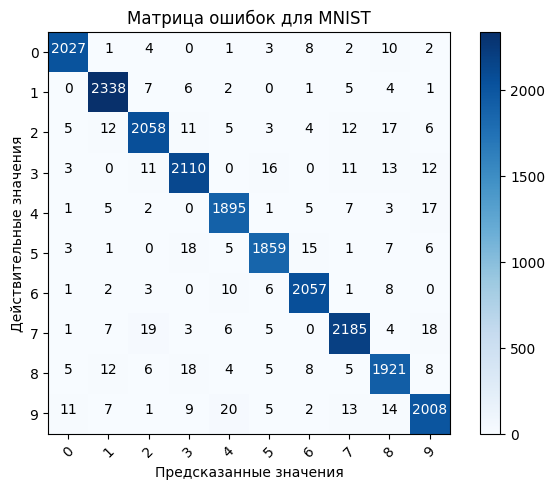

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
# Создаем матрицу ошибок
cm = confusion_matrix(y_true, y_pred)

# Отрисовываем матрицу ошибок
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Матрица ошибок для MNIST')
plt.colorbar()
tick_marks = np.arange(10) # 10 классов для MNIST
plt.xticks(tick_marks, range(10), rotation=45) # Метки для классов (0-9)
plt.yticks(tick_marks, range(10)) # Метки для классов (0-9)

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

In [ ]:
import joblib
# Сохраните модель в файл
joblib.dump(mlp, 'NeuroNumbers.pkl')

['NeuroNumbers.pkl']

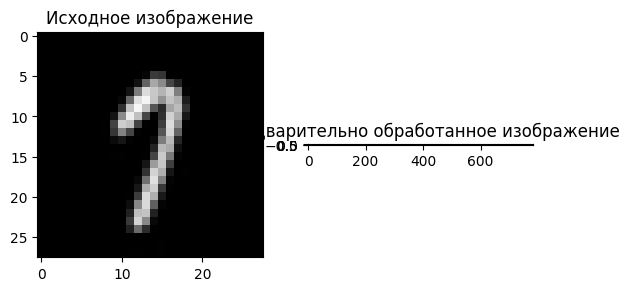

Предсказанный класс: ['7']


In [ ]:
from PIL import Image
import numpy as np
import joblib

   # Загрузка модели
loaded_model = joblib.load('NeuroNumbers.pkl')

   # Загрузка изображения
image_path = 'new_image6.png'
image = Image.open(image_path)

   # Изменение размера изображения
image = image.resize((28, 28))

    # Преобразование изображения в оттенки серого
new_image = np.array(image.convert('L'))
new_image = new_image.reshape(1, -1)  #  Изменение размерности в вектор

# Визуализация исходного изображения
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Исходное изображение')

# Визуализация изображения после предварительной обработки
plt.subplot(1, 2, 2)
plt.imshow(new_image, cmap='gray')
plt.title('Предварительно обработанное изображение')
plt.show()
  # Предсказание класса изображения
predicted_class = loaded_model.predict(new_image)
print(f'Предсказанный класс: {predicted_class}')